In [52]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
# check current working directory
print('before the working directory',os.getcwd())

#Set working directory
path = r'K:\Essex\CE802_Machine Learning\CE802_P3_Data'
os.chdir(path)

print('current working directory', os.getcwd())

before the working directory K:\Essex\CE802_Machine Learning\CE802_P3_Data
current working directory K:\Essex\CE802_Machine Learning\CE802_P3_Data


In [54]:
# Read the train dataset
train = pd.read_csv('CE802_P3_Data.csv')
train.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F26,F27,F28,F29,F30,F31,F32,F33,F34,Target
0,28.74,-268.77,62.76,4,38.46,-535.96,538.08,18.37,3.34,-11.67,...,6.20,4110.78,-2.36,27.60,922.07,-1006.92,12,28.38,High,184.93
1,60.30,-11.37,61.32,6,76.09,-441.44,-1614.94,1.73,0.88,-10.30,...,23.58,2050.63,-0.43,55.40,1151.12,-493.71,21,59.49,Very high,83.33
2,-59.58,-305.94,67.35,16,104.74,-448.60,-154.42,72.08,11.36,-5.58,...,2.16,1003.06,-2.81,66.80,329.39,-710.04,6,36.69,Very low,-8.93
3,171.36,-51.48,69.72,10,82.82,-470.62,-1056.76,0.00,4.82,-6.01,...,10.72,11991.41,-1.49,58.32,669.98,-953.94,15,31.35,High,11.72
4,-97.74,-54.00,66.69,8,54.23,-372.46,-480.02,18.13,3.90,-13.63,...,3.08,-223.59,0.06,51.74,679.19,-2098.38,9,34.89,Low,484.05


In [55]:
#Get the information of train dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1400 non-null   float64
 1   F2      1400 non-null   float64
 2   F3      1400 non-null   float64
 3   F4      1400 non-null   int64  
 4   F5      1400 non-null   float64
 5   F6      1400 non-null   float64
 6   F7      1400 non-null   float64
 7   F8      1400 non-null   float64
 8   F9      1400 non-null   float64
 9   F10     1400 non-null   float64
 10  F11     1400 non-null   float64
 11  F12     1400 non-null   float64
 12  F13     1400 non-null   float64
 13  F14     1400 non-null   float64
 14  F15     1400 non-null   float64
 15  F16     1400 non-null   object 
 16  F17     1400 non-null   float64
 17  F18     1400 non-null   float64
 18  F19     1400 non-null   float64
 19  F20     1400 non-null   float64
 20  F21     1400 non-null   float64
 21  F22     1400 non-null   float64
 22  

In [56]:
# Get the data types of each column
train.dtypes

F1        float64
F2        float64
F3        float64
F4          int64
F5        float64
F6        float64
F7        float64
F8        float64
F9        float64
F10       float64
F11       float64
F12       float64
F13       float64
F14       float64
F15       float64
F16        object
F17       float64
F18       float64
F19       float64
F20       float64
F21       float64
F22       float64
F23       float64
F24       float64
F25       float64
F26       float64
F27       float64
F28       float64
F29       float64
F30       float64
F31       float64
F32         int64
F33       float64
F34        object
Target    float64
dtype: object

In [57]:
# Checking for Null values from train dataset
train.isnull().sum()

F1        0
F2        0
F3        0
F4        0
F5        0
F6        0
F7        0
F8        0
F9        0
F10       0
F11       0
F12       0
F13       0
F14       0
F15       0
F16       0
F17       0
F18       0
F19       0
F20       0
F21       0
F22       0
F23       0
F24       0
F25       0
F26       0
F27       0
F28       0
F29       0
F30       0
F31       0
F32       0
F33       0
F34       0
Target    0
dtype: int64

<AxesSubplot:>

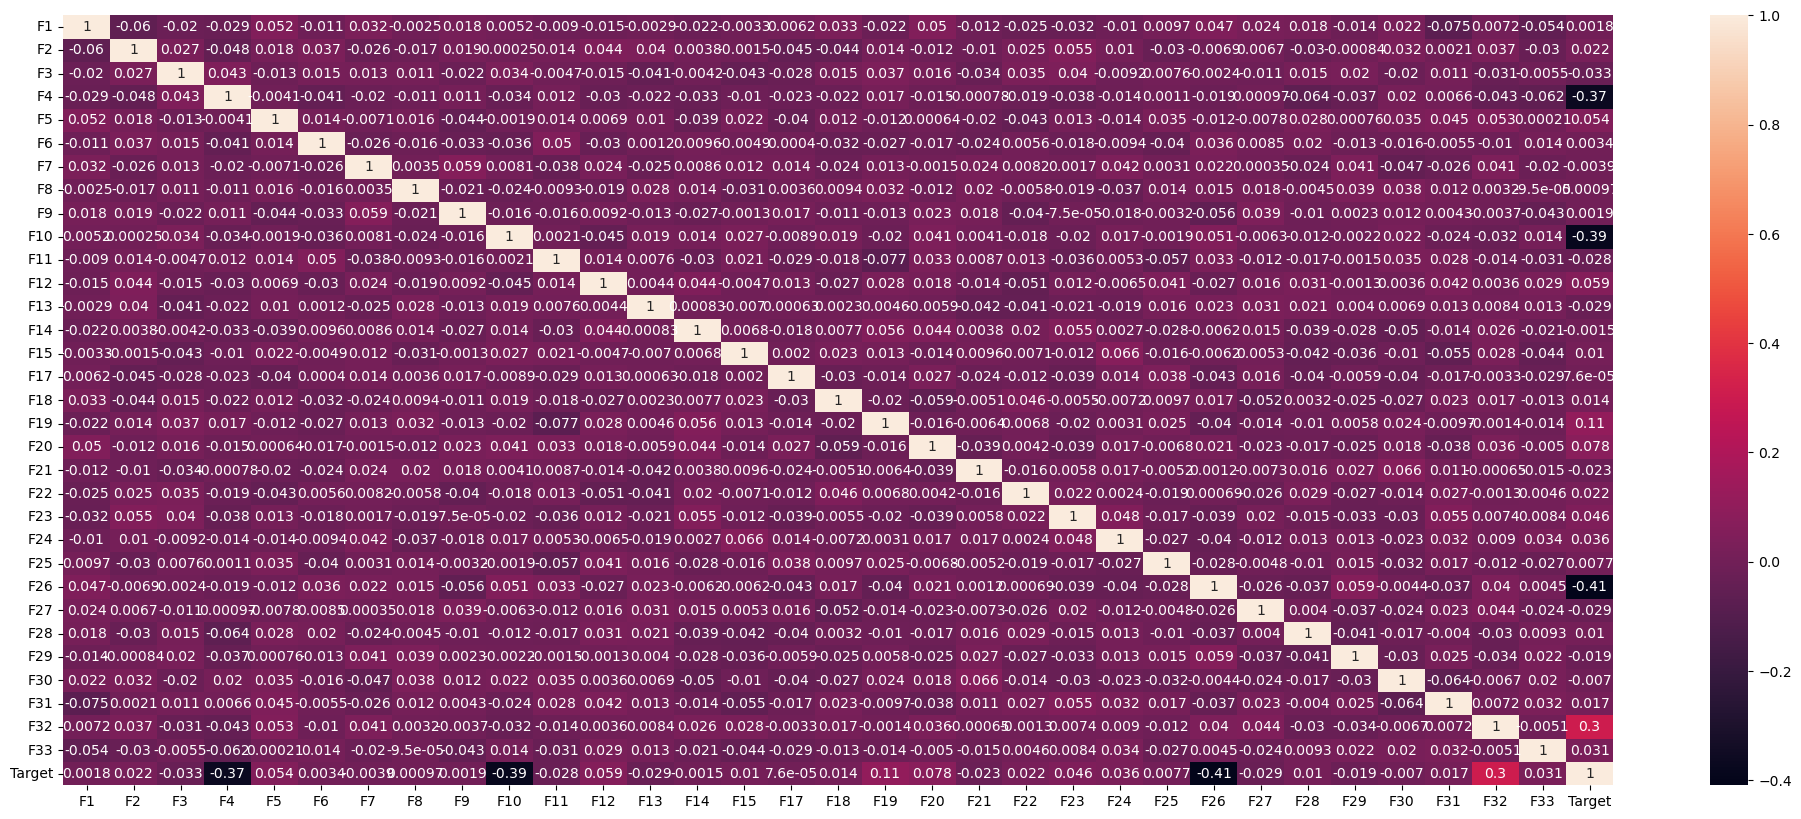

In [58]:
# Using the correlation map with the train dataset
corr = train.corr()
plt.figure(figsize=(25,10))
sns.heatmap(corr, annot = True)

In [59]:
# Encode the F16 and F34 column since it is string variable.
enc = train[['F16','F34']]
enc = pd.get_dummies(data=enc, drop_first=True)
enc.isnull().sum()

F16_Rest         0
F16_UK           0
F16_USA          0
F34_Low          0
F34_Medium       0
F34_Very high    0
F34_Very low     0
dtype: int64

In [60]:
# concat the enc dataframe into training dataframe
train_new = pd.concat([train,enc], axis = 1)
# Remove the F16 and F34 column
train_new = train_new.drop(['F16'], axis = 1)
train_new = train_new.drop(['F34'], axis = 1)

In [61]:
train_new.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F32,F33,Target,F16_Rest,F16_UK,F16_USA,F34_Low,F34_Medium,F34_Very high,F34_Very low
0,28.74,-268.77,62.76,4,38.46,-535.96,538.08,18.37,3.34,-11.67,...,12,28.38,184.93,0,0,0,0,0,0,0
1,60.30,-11.37,61.32,6,76.09,-441.44,-1614.94,1.73,0.88,-10.30,...,21,59.49,83.33,0,0,1,0,0,1,0
2,-59.58,-305.94,67.35,16,104.74,-448.60,-154.42,72.08,11.36,-5.58,...,6,36.69,-8.93,0,1,0,0,0,0,1
3,171.36,-51.48,69.72,10,82.82,-470.62,-1056.76,0.00,4.82,-6.01,...,15,31.35,11.72,1,0,0,0,0,0,0
4,-97.74,-54.00,66.69,8,54.23,-372.46,-480.02,18.13,3.90,-13.63,...,9,34.89,484.05,0,0,1,1,0,0,0


In [62]:
# Splitting the features and traget variable from training data set
train_new_features=train_new.drop(['Target'],axis=1)
train_new_outcome=train_new['Target']

print(train_new_features.head())
print(train_new_outcome.head())

       F1      F2     F3  F4      F5      F6       F7     F8     F9    F10  \
0   28.74 -268.77  62.76   4   38.46 -535.96   538.08  18.37   3.34 -11.67   
1   60.30  -11.37  61.32   6   76.09 -441.44 -1614.94   1.73   0.88 -10.30   
2  -59.58 -305.94  67.35  16  104.74 -448.60  -154.42  72.08  11.36  -5.58   
3  171.36  -51.48  69.72  10   82.82 -470.62 -1056.76   0.00   4.82  -6.01   
4  -97.74  -54.00  66.69   8   54.23 -372.46  -480.02  18.13   3.90 -13.63   

   ...      F31  F32    F33  F16_Rest  F16_UK  F16_USA  F34_Low  F34_Medium  \
0  ... -1006.92   12  28.38         0       0        0        0           0   
1  ...  -493.71   21  59.49         0       0        1        0           0   
2  ...  -710.04    6  36.69         0       1        0        0           0   
3  ...  -953.94   15  31.35         1       0        0        0           0   
4  ... -2098.38    9  34.89         0       0        1        1           0   

   F34_Very high  F34_Very low  
0              0       

In [63]:
# split the train and test dataset
from sklearn import linear_model, metrics
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_new_features, train_new_outcome, test_size=0.2,random_state=42)

In [64]:
# Read the test dataset
test=pd.read_csv('CE802_P3_Test.csv')
test.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F26,F27,F28,F29,F30,F31,F32,F33,F34,Target
0,51.87,-311.10,58.77,8,50.13,-450.22,-333.80,4.89,7.30,-14.09,...,8.50,2387.80,-2.96,41.36,1377.02,-1662.93,6,36.18,Low,NaN
1,-59.40,-199.77,67.65,12,84.79,-478.46,-94.44,1.13,9.16,-4.50,...,5.88,2880.12,4.88,53.82,636.71,-2369.52,3,24.24,Low,NaN
2,-92.73,-113.13,61.29,8,114.52,-385.14,-606.40,0.14,5.38,-3.80,...,8.04,4418.92,-1.03,47.96,776.66,-1642.62,18,42.39,Medium,NaN
3,87.33,-192.12,42.03,8,41.60,-505.26,-1461.08,0.20,5.78,-6.35,...,6.82,-1116.70,-5.44,50.40,295.15,-444.54,18,36.33,High,NaN
4,45.36,-233.07,69.21,10,96.87,-722.36,-129.62,0.10,9.44,-6.65,...,0.52,4737.75,-4.79,45.84,1142.06,-1707.42,6,50.79,Very high,NaN


In [65]:
# Get the information about the test dataset
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1300 non-null   float64
 1   F2      1300 non-null   float64
 2   F3      1300 non-null   float64
 3   F4      1300 non-null   int64  
 4   F5      1300 non-null   float64
 5   F6      1300 non-null   float64
 6   F7      1300 non-null   float64
 7   F8      1300 non-null   float64
 8   F9      1300 non-null   float64
 9   F10     1300 non-null   float64
 10  F11     1300 non-null   float64
 11  F12     1300 non-null   float64
 12  F13     1300 non-null   float64
 13  F14     1300 non-null   float64
 14  F15     1300 non-null   float64
 15  F16     1300 non-null   object 
 16  F17     1300 non-null   float64
 17  F18     1300 non-null   float64
 18  F19     1300 non-null   float64
 19  F20     1300 non-null   float64
 20  F21     1300 non-null   float64
 21  F22     1300 non-null   float64
 22  

In [66]:
# Encoding variables F16 and F34 since they are catogorical variables.
enc = test[['F16','F34']]
enc = pd.get_dummies(data=enc, drop_first=True)

In [67]:
#concate the encoding dataframe with test dataset
test_new = pd.concat([test,enc],axis=1)
# Drop the F16 and F34 column from test dataset
test_new = test_new.drop(['F16'], axis = 1)
test_new = test_new.drop(['F34'], axis = 1)

In [68]:
test_new.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F32,F33,Target,F16_Rest,F16_UK,F16_USA,F34_Low,F34_Medium,F34_Very high,F34_Very low
0,51.87,-311.10,58.77,8,50.13,-450.22,-333.80,4.89,7.30,-14.09,...,6,36.18,NaN,0,0,1,1,0,0,0
1,-59.40,-199.77,67.65,12,84.79,-478.46,-94.44,1.13,9.16,-4.50,...,3,24.24,NaN,0,1,0,1,0,0,0
2,-92.73,-113.13,61.29,8,114.52,-385.14,-606.40,0.14,5.38,-3.80,...,18,42.39,NaN,0,0,0,0,1,0,0
3,87.33,-192.12,42.03,8,41.60,-505.26,-1461.08,0.20,5.78,-6.35,...,18,36.33,NaN,0,0,0,0,0,0,0
4,45.36,-233.07,69.21,10,96.87,-722.36,-129.62,0.10,9.44,-6.65,...,6,50.79,NaN,0,0,1,0,0,1,0


In [69]:
# Split the features and target variable from the test dataset
test_new_features = test_new.drop(['Target'],axis=1)
test_new_outcome = test_new['Target']

print(test_new_features.head())
print(test_new_outcome.head())

      F1      F2     F3  F4      F5      F6       F7    F8    F9    F10  ...  \
0  51.87 -311.10  58.77   8   50.13 -450.22  -333.80  4.89  7.30 -14.09  ...   
1 -59.40 -199.77  67.65  12   84.79 -478.46   -94.44  1.13  9.16  -4.50  ...   
2 -92.73 -113.13  61.29   8  114.52 -385.14  -606.40  0.14  5.38  -3.80  ...   
3  87.33 -192.12  42.03   8   41.60 -505.26 -1461.08  0.20  5.78  -6.35  ...   
4  45.36 -233.07  69.21  10   96.87 -722.36  -129.62  0.10  9.44  -6.65  ...   

       F31  F32    F33  F16_Rest  F16_UK  F16_USA  F34_Low  F34_Medium  \
0 -1662.93    6  36.18         0       0        1        1           0   
1 -2369.52    3  24.24         0       1        0        1           0   
2 -1642.62   18  42.39         0       0        0        0           1   
3  -444.54   18  36.33         0       0        0        0           0   
4 -1707.42    6  50.79         0       0        1        0           0   

   F34_Very high  F34_Very low  
0              0             0  
1       

## LINEAR REGRESSION

In [70]:
from sklearn.linear_model import LinearRegression

In [71]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [72]:
#predictions on test set
lr_pred = lr.predict(X_test)
lr_pred

array([-2.36508168e+02, -1.17672098e+02,  1.43460581e+02,  4.31686161e+01,
        1.37011171e+02,  2.17425907e+02,  4.05400488e+02,  2.93640135e+02,
        2.02792811e+02,  2.78363662e+02,  2.73926685e+02,  4.81818964e+02,
        6.25739540e+01,  3.62408058e+02,  4.55949303e+01,  1.35826524e+02,
        1.31947757e+02,  3.03225794e+02,  4.03776342e+02, -2.72544572e+01,
        4.80359706e+01,  2.32547130e+02,  2.49118487e+02,  2.63552627e+02,
        7.35030814e+02,  4.56236970e+02,  6.99749566e+01,  2.30701345e+02,
        1.89807915e+02,  2.94288017e+02,  2.59295256e+02, -3.09033692e+02,
        1.05003228e+02,  1.20609849e+02, -1.65685202e+01,  2.35486259e+02,
        5.16505343e+02,  1.97004734e+02,  1.92717799e+02,  4.61177262e+02,
        5.40608870e+02,  3.40314948e+02,  1.07953822e+02,  3.10228125e+02,
        2.31224170e+02,  1.01163234e+02,  4.92027750e+02,  2.12276631e+02,
        2.65163285e+02,  2.98610945e+02,  2.40910068e+02,  3.26805791e+02,
        2.91021031e+02,  

C:\Users\mkart\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Target'>

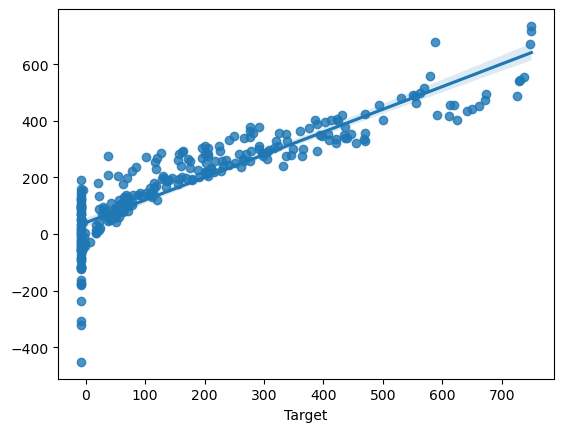

In [73]:
sns.regplot(y_test, lr_pred)

In [74]:
lm_pred_test = lr.predict(test_new_features)

In [75]:
metrics.mean_squared_error(y_test, lr_pred)

8716.959531263805

## RANDOM FOREST CLASSIFIER

In [76]:
#Random Forest Regression using grid search CV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [77]:
grid = {'bootstrap': [True],
              'max_depth': [50, 70, 90, 120],
              'max_features':[2, 3, 4],
              'min_samples_leaf': [4, 5, 6],
              'n_estimators': [100,200,300,500]}

rf = RandomForestRegressor()
gridsearch = GridSearchCV(estimator = rf, param_grid = grid, cv=3, n_jobs = -1, verbose = 2)

In [78]:
gridsearch.fit(X_train, y_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [50, 70, 90, 120],
                         'max_features': [2, 3, 4],
                         'min_samples_leaf': [4, 5, 6],
                         'n_estimators': [100, 200, 300, 500]},
             verbose=2)

In [79]:
print(gridsearch.best_estimator_)

RandomForestRegressor(max_depth=50, max_features=4, min_samples_leaf=4)


In [80]:
best_rf = RandomForestRegressor(max_depth=50, max_features=4, min_samples_leaf=4, n_estimators=500, random_state=10)
best_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=50, max_features=4, min_samples_leaf=4,
                      n_estimators=500, random_state=10)

In [81]:
rf_pred= best_rf.predict(X_test)
rf_pred

array([101.79257191, 153.58498716, 219.78094791, 148.19443136,
       156.74665794, 149.6457963 , 281.82418301, 230.07996195,
       153.3931973 , 155.67050402, 193.0780465 , 242.93338365,
       141.56613218, 234.76681597, 157.68247172, 140.48444163,
       156.68311324, 308.93890451, 233.65933255, 102.08397675,
       133.61501521, 145.47354647, 239.44763351, 227.17607406,
       312.57878353, 303.85946405, 130.91416018, 221.22964472,
       175.4949932 , 211.84408014, 243.1980894 ,  92.97960215,
       162.42224793, 124.75311916, 123.15985967, 160.61520774,
       292.2833275 , 202.97696714, 169.42680078, 286.29114781,
       378.2627251 , 290.41344406, 161.61636198, 264.56690197,
       169.67635064, 170.21692733, 327.30863047, 200.73388997,
       228.67313865, 198.60393548, 172.02782264, 279.50680483,
       201.46014302, 207.42441664,  98.94663511, 129.39047338,
       117.39129313, 148.96893245, 121.8227145 , 153.78859876,
       141.6144983 , 439.21433215, 117.75325745, 150.47

In [82]:
#predections on test data
rf_pred_test = best_rf.predict(test_new_features)
rf_pred_test

array([250.03652822,  67.23600863, 164.70259653, ..., 244.3185027 ,
        48.52353904,  98.57716787])

In [83]:
# Mean square error of the bestfit model
metrics.mean_squared_error(y_test, rf_pred)

21648.76138314982

## DECESION TREE CLASSIFIER

In [84]:
# using Decesion Tree Regressor to predict the values
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as mse

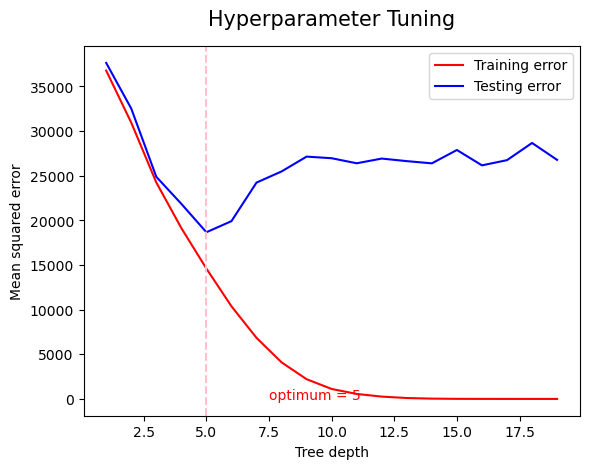

In [85]:
max_depths = range(1, 20)
train_error = []
for max_depth in max_depths:
    model_1_tree = DecisionTreeRegressor(max_depth=max_depth)
    model_1_tree.fit(train_new_features, train_new_outcome)
    train_error.append(mse(train_new_outcome, model_1_tree.predict(train_new_features)))
    
test_error = []
for max_depth in max_depths:
    model_2_tree = DecisionTreeRegressor(max_depth=max_depth)
    model_2_tree.fit(X_train, y_train)
    test_error.append(mse(y_test, model_2_tree.predict(X_test)))

plt.plot(max_depths, train_error, color='red', label='Training error')
plt.plot(max_depths, test_error, color='blue', label='Testing error')
plt.xlabel('Tree depth')
plt.axvline(x=5, color='pink', linestyle='--')
plt.annotate('optimum = 5', xy=(7.5, 1.17), color='red')
plt.ylabel('Mean squared error')
plt.title('Hyperparameter Tuning', pad=15, size=15)
plt.legend()
#plt.savefig('error.png')

In [86]:
# performing grid search CV

tree_classifier = DecisionTreeRegressor()
gridsearch_dtree = GridSearchCV(tree_classifier,
                  param_grid = {'max_depth': range(1, 10),
                                'min_samples_split': range(10, 30, 10)},
                  cv=5,
                  n_jobs=-1,
                  scoring='neg_mean_squared_error')
gridsearch_dtree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': range(1, 10),
                         'min_samples_split': range(10, 30, 10)},
             scoring='neg_mean_squared_error')

In [87]:
print(gridsearch_dtree.best_params_)

{'max_depth': 4, 'min_samples_split': 10}


In [88]:
#applying the best parameters from above results to train the model
best_tree = DecisionTreeRegressor(max_depth=4,
                                  min_samples_split=20)
best_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, min_samples_split=20)

In [89]:
#new predictions on test data
best_tree_pred = best_tree.predict(X_test)
best_tree_pred

array([ 19.33073171,  74.98390476, 312.78987097, 186.96752809,
        71.10630769, 208.18794872, 312.78987097, 186.96752809,
        74.98390476, 186.96752809, 110.35409091, 312.78987097,
        74.98390476, 208.18794872, 264.35395349, 208.18794872,
       239.25157895, 312.78987097, 208.18794872,  74.98390476,
        19.33073171,  71.10630769, 312.78987097, 312.78987097,
       239.25157895, 373.48658537,  74.98390476, 312.78987097,
       186.96752809, 208.18794872, 312.78987097,  74.98390476,
       186.96752809,  71.10630769,  71.10630769, 264.35395349,
       312.78987097, 186.96752809, 264.35395349, 312.78987097,
       634.28435484, 312.78987097,  71.10630769, 634.28435484,
       239.25157895, 208.18794872, 312.78987097, 208.18794872,
       186.96752809, 239.25157895, 312.78987097, 264.35395349,
       239.25157895, 208.18794872,   9.6660355 , 239.25157895,
        74.98390476,  74.98390476,   9.6660355 ,  19.33073171,
       208.18794872, 634.28435484,   9.6660355 , 239.25

In [90]:
#predictions on Unseen data
best_tree_pred_test = best_tree.predict(test_new_features)
best_tree_pred_test

array([634.28435484,  74.98390476,  74.98390476, ..., 312.78987097,
         9.6660355 ,   9.6660355 ])

In [91]:
# Mean square error of the DTR
metrics.mean_squared_error(y_test, best_tree_pred)

21847.412268853277

In [92]:
# Transfering the prediction data to test csv file.

test['Target'] = lm_pred_test
test.to_csv(r'CE802_P3_Test_predcitions.csv')
print('output file successfully generated!')

output file successfully generated!


In [93]:
test.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F26,F27,F28,F29,F30,F31,F32,F33,F34,Target
0,51.87,-311.10,58.77,8,50.13,-450.22,-333.80,4.89,7.30,-14.09,...,8.50,2387.80,-2.96,41.36,1377.02,-1662.93,6,36.18,Low,314.855371
1,-59.40,-199.77,67.65,12,84.79,-478.46,-94.44,1.13,9.16,-4.50,...,5.88,2880.12,4.88,53.82,636.71,-2369.52,3,24.24,Low,-143.290010
2,-92.73,-113.13,61.29,8,114.52,-385.14,-606.40,0.14,5.38,-3.80,...,8.04,4418.92,-1.03,47.96,776.66,-1642.62,18,42.39,Medium,30.955259
3,87.33,-192.12,42.03,8,41.60,-505.26,-1461.08,0.20,5.78,-6.35,...,6.82,-1116.70,-5.44,50.40,295.15,-444.54,18,36.33,High,123.578377
4,45.36,-233.07,69.21,10,96.87,-722.36,-129.62,0.10,9.44,-6.65,...,0.52,4737.75,-4.79,45.84,1142.06,-1707.42,6,50.79,Very high,304.825368
